# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
customers.shape

(440, 8)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


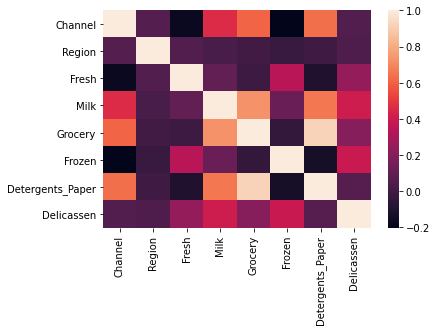

In [8]:
sns.heatmap(customers.corr());

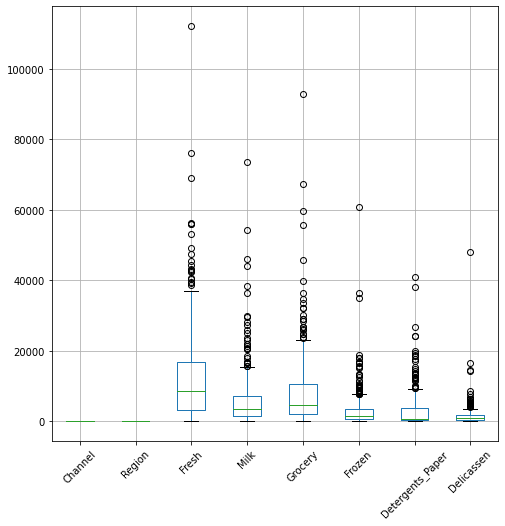

In [9]:
plt.figure(figsize=(8, 8))
customers.boxplot()
plt.xticks(rotation=45)
plt.show();

In [10]:
customers_clean = customers.copy()

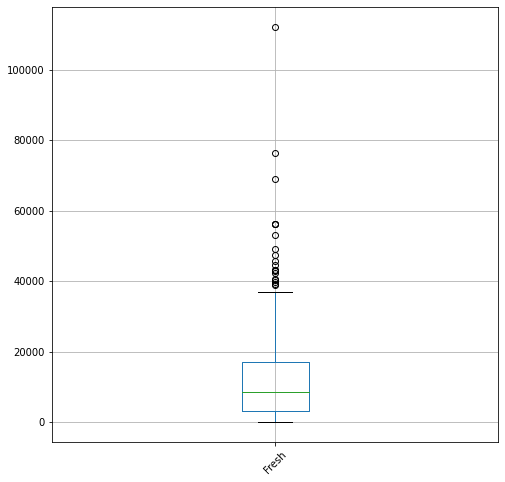

In [11]:
plt.figure(figsize=(8, 8))
customers.boxplot(column=['Fresh'])
plt.xticks(rotation=45)
plt.show();

In [34]:
customers_clean.Fresh = customers_clean.Fresh[customers_clean.Fresh < 40000]

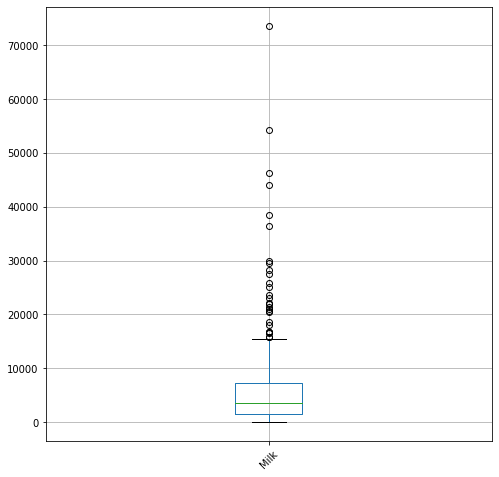

In [13]:
plt.figure(figsize=(8, 8))
customers.boxplot(column=['Milk'])
plt.xticks(rotation=45)
plt.show();

In [35]:
customers_clean.Milk = customers_clean.Milk[customers_clean.Milk < 25000]

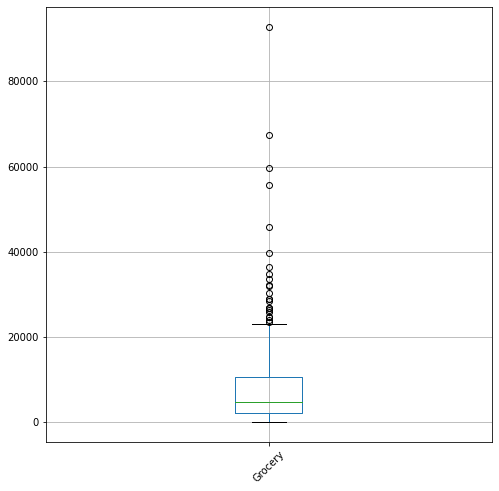

In [15]:
plt.figure(figsize=(8, 8))
customers.boxplot(column=['Grocery'])
plt.xticks(rotation=45)
plt.show();

In [30]:
customers_clean.Grocery = customers_clean.Grocery[customers_clean.Grocery < 30000]

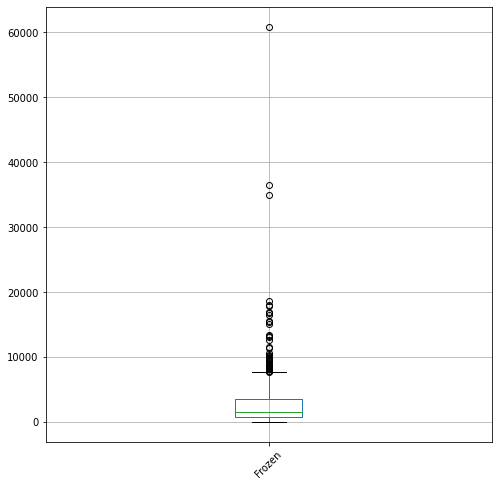

In [17]:
plt.figure(figsize=(8, 8))
customers.boxplot(column=['Frozen'])
plt.xticks(rotation=45)
plt.show();

In [18]:
customers_clean.Frozen = customers_clean.Frozen[customers_clean.Frozen < 20000]

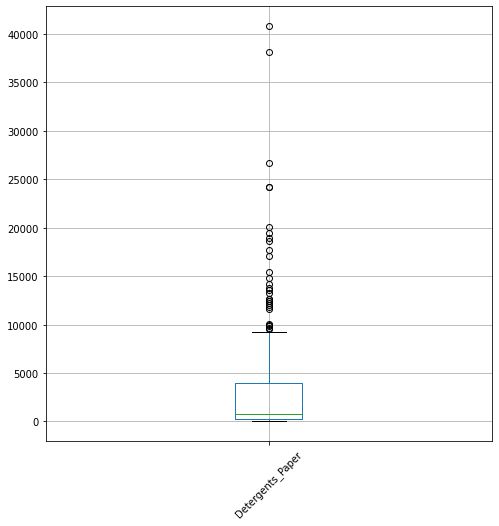

In [19]:
plt.figure(figsize=(8, 8))
customers.boxplot(column=['Detergents_Paper'])
plt.xticks(rotation=45)
plt.show();

In [20]:
customers_clean.Detergents_Paper = customers_clean.Detergents_Paper[customers_clean.Detergents_Paper < 20000]

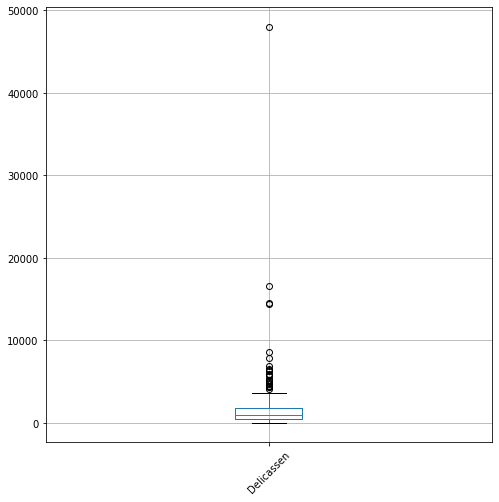

In [21]:
plt.figure(figsize=(8, 8))
customers.boxplot(column=['Delicassen'])
plt.xticks(rotation=45)
plt.show();

In [22]:
customers_clean.Delicassen = customers_clean.Delicassen[customers_clean.Delicassen < 10000]

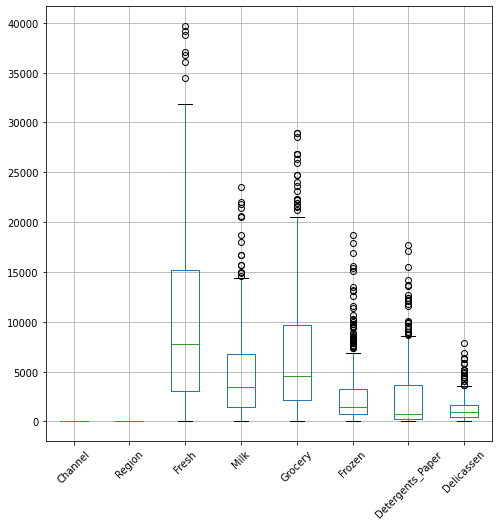

In [36]:
plt.figure(figsize=(8, 8))
customers_clean.boxplot()
plt.xticks(rotation=45)
plt.show();

In [37]:
customers_clean.dropna(inplace=True)

In [40]:
customers_clean[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0
...,...,...,...,...,...,...
434,16731.0,3922.0,7994.0,688.0,2371.0,838.0
435,29703.0,12051.0,16027.0,13135.0,182.0,2204.0
436,39228.0,1431.0,764.0,4510.0,93.0,2346.0
438,10290.0,1981.0,2232.0,1038.0,168.0,2125.0


In [38]:
print(customers.shape,customers_clean.shape)

(440, 8) (404, 8)


#### What does each column mean?

+ FRESH: annual spending (m.u.) on fresh products (Continuous)
+ MILK: annual spending (m.u.) on milk products (Continuous)
+ GROCERY: annual spending (m.u.)on grocery products (Continuous);
+ FROZEN: annual spending (m.u.)on frozen products (Continuous)
+ DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
+ DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
+ CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
+ REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

#### Any categorical data to convert?

Ya están convertidas las columnas de channel y region
   
#### Any missing data to remove?
Se removieron 

#### Column collinearity - any high correlations?
no hay correlación significativa

#### Descriptive statistics - any outliers to remove?
Se removieron

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

### hecho arriba


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers_clean[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])
customers_scale = pd.DataFrame(customers_scale, columns =['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'] )

In [46]:
customers_scale

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.295817,1.128670,0.141244,-0.776280,0.122641,0.092873
1,-0.345448,1.164349,0.465467,-0.280417,0.323592,0.460091
2,-0.425891,0.932204,0.161114,-0.074448,0.395986,5.547487
3,0.363920,-0.831356,-0.398319,1.206529,-0.580849,0.470152
4,1.432313,0.144950,0.082603,0.409242,-0.168559,3.318188
...,...,...,...,...,...,...
399,0.759968,-0.199792,0.211194,-0.624446,0.024276,-0.326325
400,2.242234,1.683548,1.508891,3.362634,-0.686357,0.818925
401,3.330624,-0.776911,-0.956783,0.599835,-0.715249,0.937978
402,0.023976,-0.649486,-0.719634,-0.512332,-0.690902,0.752692


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [47]:
# Your code here:
from sklearn.cluster import KMeans

kmeans=KMeans()
clusters=kmeans.fit(customers_scale) 

Count the values in `labels`.

In [51]:
# Your code here:
len(clusters.labels_)

404

In [61]:
customers_clean['kmeanslabels'] = clusters.labels_

In [70]:
customers_clean.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeanslabels,dbscanlabels
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,1,-1
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,1,-1
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,7,-1
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,5,-1
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,6,-1


In [56]:
customers_clean.labels.value_counts()

0    141
1     75
2     54
5     39
6     36
3     33
4     15
7     11
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [58]:
# Your code here
from sklearn.cluster import DBSCAN



In [59]:
dbscan=DBSCAN(eps=0.5)
clustersdbscan = dbscan.fit(customers_scale)

Count the values in `labels_DBSCAN`.

In [66]:
# Your code here
customers_clean['dbscanlabels'] = clustersdbscan.labels_

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

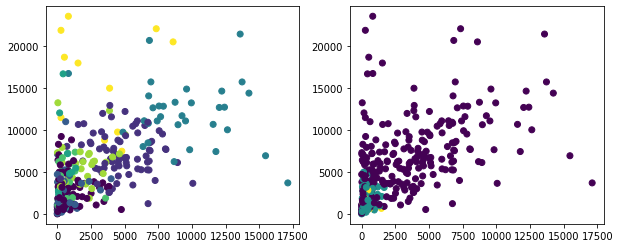

In [67]:
# Your code here:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1) 
plt.scatter(customers_clean.Detergents_Paper,customers_clean.Milk, c=clusters.labels_)
plt.subplot(1, 2, 2)  
plt.scatter(customers_clean.Detergents_Paper,customers_clean.Milk, c=clustersdbscan.labels_)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

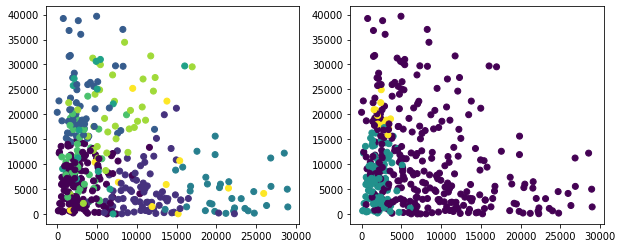

In [68]:
# Your code here:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1) 
plt.scatter(customers_clean.Grocery,customers_clean.Fresh, c=clusters.labels_)
plt.subplot(1, 2, 2)  
plt.scatter(customers_clean.Grocery,customers_clean.Fresh, c=clustersdbscan.labels_)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

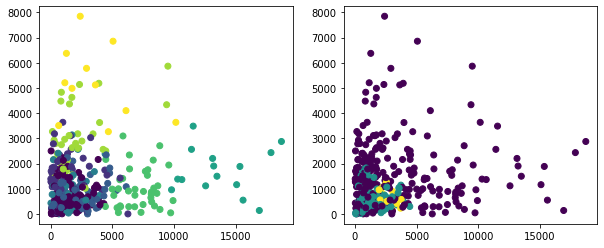

In [69]:
# Your code here:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1) 
plt.scatter(customers_clean.Frozen,customers_clean.Delicassen, c=clusters.labels_)
plt.subplot(1, 2, 2)  
plt.scatter(customers_clean.Frozen,customers_clean.Delicassen, c=clustersdbscan.labels_)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [71]:
# Your code here:
customers_clean.groupby(['kmeanslabels','dbscanlabels']).mean()

Channel    Region         Fresh          Milk  \
kmeanslabels dbscanlabels                                                   
0            -1            1.136364  2.386364   6134.227273   3453.318182   
              0            1.010309  2.628866   6099.927835   1645.185567   
1            -1            1.760000  2.666667   4791.440000   7200.093333   
2            -1            1.114286  2.571429  24964.600000   2905.057143   
              0            1.000000  2.166667  15895.333333   1160.666667   
              1            1.000000  2.384615  19373.615385   1424.307692   
3            -1            2.000000  2.454545   4807.454545  11994.030303   
4            -1            1.066667  2.533333  17721.333333   4622.533333   
5            -1            1.078947  2.421053  10424.684211   2950.921053   
              0            1.000000  2.000000   9784.000000    925.000000   
6            -1            1.388889  2.638889  19648.055556   5524.444444   
7            -1            1.545455  2.181818   8429.454545  16100.545455   

                                Grocery        Frozen  Detergents_Paper  \
kmeanslabels dbscanlabels                                                 
0            -1             4858.022727   1375.272727       1246.909091   
              0             2068.134021   1426.597938        391.618557   
1            -1            10958.720000   1233.000000       4836.586667   
2            -1             3725.228571   2248.200000        674.171429   
              0             2065.500000   1340.166667        249.000000   
              1             2552.461538   2732.769231        470.230769   
3            -1            21292.909091   1574.818182       9445.484848   
4            -1             4866.733333  13711.533333        467.000000   
5            -1             3032.105263   7195.447368        567.342105   
              0             2405.000000   4447.000000        183.000000   
6            -1             7078.027778   2126.638889       1786.277778   
7            -1            12826.363636   3620.000000       3283.818182   

                            Delicassen  
kmeanslabels dbscanlabels               
0            -1             873.386364  
              0             592.721649  
1            -1            1162.666667  
2            -1             927.200000  
              0             763.500000  
              1             746.769231  
3            -1            1134.181818  
4            -1            1701.933333  
5            -1            1024.815789  
              0             297.000000  
6            -1            2974.166667  
7            -1            5151.636364

Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here